CGPA vs Package Prediction
https://www.kaggle.com/datasets/parvmodi/cgpa-vs-package-in-lpa

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [26]:
Placement_dataset = pd.read_csv("/content/Placement.csv")
print(Placement_dataset)

     cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]


In [27]:
Placement_dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [28]:
Placement_dataset.tail()

,cgpa,package
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96
199,6.22,2.33


In [29]:
Placement_dataset.shape

(200, 2)

In [30]:
Placement_dataset.info

<bound method DataFrame.info of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

In [31]:
Placement_dataset.describe

<bound method NDFrame.describe of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

In [32]:
Placement_dataset.isnull()

,cgpa,package
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [33]:
Placement_dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

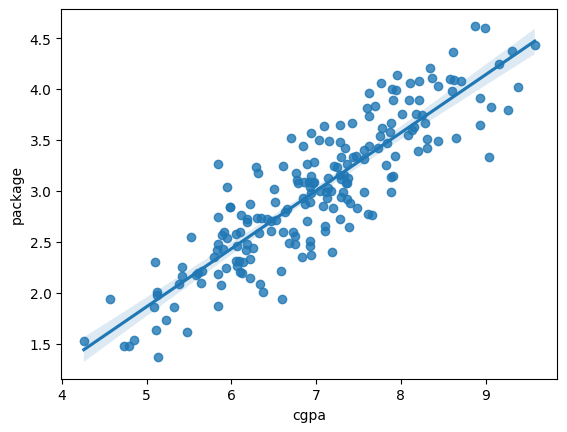

In [34]:
sns.regplot(x= Placement_dataset['cgpa'], y= Placement_dataset['package'])
plt.show()

In [35]:
x = Placement_dataset['cgpa']
y = Placement_dataset['package']

In [36]:
#Train test split
[x_train, x_test, y_train, y_test] = train_test_split(x,y, train_size = 0.90, random_state=2)
print('The shape of x_train is', x_train.shape)
print('The shape of x_test is', x_test.shape)
print('The shape of y_train is', y_train.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (180,)
The shape of x_test is (20,)
The shape of y_train is (180,)
The shape of y_test is (20,)


In [37]:
x_train_lm = x_train.values.reshape(-1,1)
print('The shape of x_train_lm is',x_train_lm.shape)
x_test_lm = x_test.values.reshape(-1,1)
print('The shape of x_test_lm is',x_test_lm.shape)

The shape of x_train_lm is (180, 1)
The shape of x_test_lm is (20, 1)


In [38]:
lm =LinearRegression()

In [39]:
lm.fit(x_train_lm,y_train)

LinearRegression()

In [40]:
print('The coefficient is',round(lm.coef_[0],2))
print('The intercept is', round(lm.intercept_,2))

The coefficient is 0.56
The intercept is -0.95


In [41]:
x_train_data_pred = lm.predict(x_train_lm)

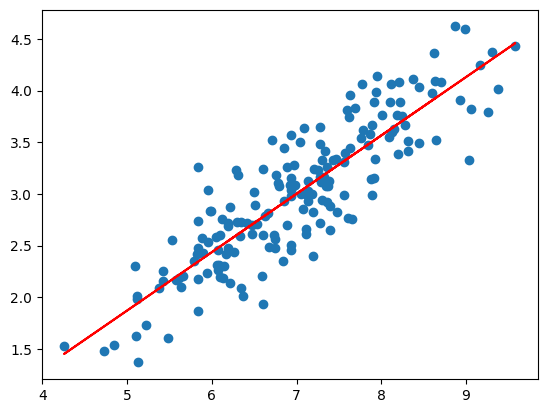

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_train,x_train_data_pred,color = 'r')
plt.show()

In [43]:
#make prediction on the test set
x_test_data_pred = lm.predict(x_test_lm)


In [44]:
r_square_train = round(r2_score(y_true = y_train, y_pred = x_train_data_pred), 2)
r_square_test = round(r2_score(y_true = y_test, y_pred = x_test_data_pred), 2)


In [45]:
print('The R-squared for thr training set is', r_square_train)
print('The R-squared for thr test set is', r_square_test)

The R-squared for thr training set is 0.76
The R-squared for thr test set is 0.85


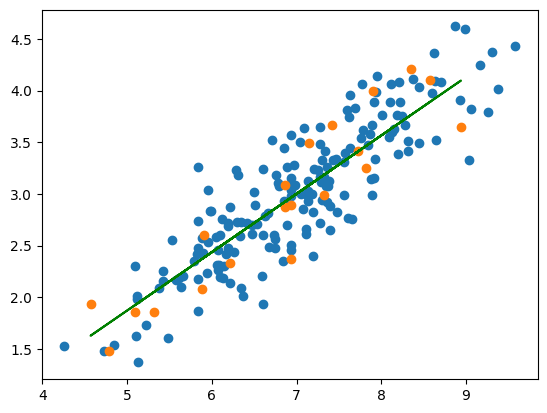

In [46]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x_test,x_test_data_pred,color = 'g')
plt.show()

In [47]:
#Make predictive model
#Now predict on new input unseen data points
input_data = (8.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lm.predict(input_data_reshaped)
print(prediction)

[3.84830487]
